# Excecutive Summary 

### To summarize our overall results, we discovered that grouping stocks by market-determined industries is a [poor measure](#link1) of financial proximity and relative stock movement. Rather, we found that stocks can actually be grouped together into new sectors that are [more indicative](#link2) of their financials and movements. We grouped every stock in the S&P 500 as of July 2020 into new sectors with [coded nomenclature](#link3) by their relative price, yield, and volatility. Although these new groups are not portfolio-shapers and should not be used solely to choose whih stock one should invest in, they are far more indicative of which stocks are financially similar to each other and may be a great starting point for new investors. Overall, the stocks in our new sectors were accurately predictable based on financial metrics 85% of the time, relative to 35% of the time using current sector naming conventions.

# Introduction
To give some background about the S&P 500 and stocks in general: they tend to be categorized by industry. These industries can be really broad, such as ‘Financials’ which envelopes the entire financial sector. With such umbrella terms, it becomes difficult for the industry to be indicative of how companies within it perform in the stock market. 

Research shows that about [42% of Americans don't own stocks](https://www.fool.com/the-ascent/buying-stocks/articles/42-of-americans-dont-own-stocks-heres-why-thats-a-problem/) and [50% of Americans don’t know whether it’s better to invest in a single stock or mutual fund](https://www.cnbc.com/2020/02/19/50percent-of-americans-dont-know-how-to-diversify-their-investments.html). Evidently, there seems to be a lot of confusion when it comes to the stock market, making it seem a lot more daunting than it really is. We hope to find a way to classify stocks that can help eliminate this confusion and make investing more approachable. 

Our big question:
### Is there a way to classify equities that is more indicative of their stock movement?
Our methodology is to create a benchmark for the efficacy of the current stock sectors, create and append our new sectors using a Mini-batch K-means clustering algorithm so that each cluster had a similar amount of samples, and finally compare the features of both categorization methods. 

### Motivating Sources
- [6 Different Criteria to Catergorize Stocks](https://groww.in/blog/how-are-different-stocks-categorized#:~:text=Market%20capitalization%20is%20a%20way,market%20capitalization%20(market%20cap).) indicates specific financial data that could be key to creating better categories. 
- [Using Sectors to Categorize Stocks](https://www.thebalancemoney.com/stock-sectors-how-to-classify-stocks-3141375) discusses how stocks are currently categorized by sector and that stocks within sectors may not always move together.

In [3]:
import pandas as pd
import plotly.express as px

from sklearn.decomposition import PCA

# Data Description

In [4]:

df_stocks = pd.read_csv("constituents-financials.csv")
df_stocks

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.810000e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...
500,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


### Data Dictionary

| Term                     | Definition                                                                                                               |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------|
| Name                     | Legal name of the company                                                                                                |
| Sector                   | An area of the economy where businesses share a related product or service                                               |
| Price                    | Price per share of the company                                                                                           |
| Price to Earnings (PE)   | The ratio of a company’s share price to its earnings per share                                                           |
| Dividend Yield           | The ratio of the annual dividends per share divided by the price per share                                               |
| Earnings Per Share (EPS) | A company’s profit divided by the number of shares of its stock                                                          |
| 52 week low and high     | The annual high and low of a company’s share price                                                                       |
| Market Cap               | The market value of a company’s shares (calculated as share price x number of shares)                                    |
| EBITDA                   | A company’s earnings before interest, taxes, depreciation, and amortization; often used as a proxy for its profitability |
| Price to Sales (PS)      | A company’s market cap divided by its total sales or revenue over the past year                                          |
| Price to Book (PB)       | A company’s price per share divided by its book value                                                                    |

In [5]:
# get all columns with financial data
fina_columns = df_stocks.columns[2:]

# create subset of df_stocks with all financial data
df_finances = df_stocks.loc[:, fina_columns]
df_finances.head()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34
1,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19
3,108.48,19.41,2.499560,3.29,125.86,60.050,1.810000e+11,1.031000e+10,6.291571,26.14
4,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62


Since we want to find a way to make stocks more approachable, we need to find a different way to classify stocks. By focusing on the financial data, we can supply it to our machine learning algorithm as x_features so it can train and find different clusters than industry. However, we would like to emphasize that these financial metrics are not comprehensive of a company's full fiscal picture, however, we find they are sufficient for a proof of concept and our analysis.

### Visualizations

In [6]:
# drop all NaN values
df_stocks = df_stocks.dropna()

# extract relevant x values
x = df_stocks.loc[:, fina_columns].values
# compress
pca = PCA(n_components=2, whiten=False)
x_compress = pca.fit_transform(x)

# add features back into dataframe (for plotting)
df_stocks['pca0'] = x_compress[:, 0]
df_stocks['pca1'] = x_compress[:, 1]

# scatter plot
fig = px.scatter(df_stocks, x='pca0', y='pca1', hover_data=df_stocks.columns, color='Sector')
fig.show()

/var/folders/tb/k3yxh4hd0yd7d43rn3_4f3k40000gn/T/ipykernel_23609/2352728112.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks['pca0'] = x_compress[:, 0]
/var/folders/tb/k3yxh4hd0yd7d43rn3_4f3k40000gn/T/ipykernel_23609/2352728112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks['pca1'] = x_compress[:, 1]


The PCA graph shows us stocks as they are currently classified by sectors and how natural / intuitive the present classification method is. As we can see, although some sectors are consistent outliers / naturally seem to be paired with each other, the majority of stocks lay on top of each other and could lend to better systems of classification

In [7]:
dfs = pd.read_csv("constituents-financials.csv")
dfs = dfs.dropna()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def extract_sector_composition(sector):
    """ function to get mean metrics for each sector and count of stocks above/below that mean
        Args:
            sector(str) - name of sector
        Returns:
            metrics(array): average metrics in that sector
            weight_counts(dict): count of stocks below/above each mean per metric
    """
    # extract all stocks belonging to sector and extract means
    bool_sector = dfs['Sector'] == sector
    df_stocks_sector = dfs.loc[bool_sector, :]
    sector_means = df_stocks_sector.mean(axis=0, numeric_only=True)

    # variables to store average metrics and stocks below/above that metric
    metrics = []
    weight_counts = {
        "Below": [],
        "Above": []
    }

    for i, v in sector_means.items():
        # set up boolean index for stocks above the mean per metric
        bool_above = df_stocks_sector[i] > v
        
        # count stocks above the mean
        stocks_above = df_stocks_sector.loc[bool_above, :]
        above_count = len(stocks_above.index)
        
        # count stocks below the mean
        below_count = len(df_stocks_sector.index) - len(stocks_above.index)
        
        # append to approriate data structures
        weight_counts['Below'].append(below_count)
        weight_counts['Above'].append(above_count)
        metrics.append(f'{i}\n $\\mu=${v:.2f}')
    return metrics, weight_counts

In [9]:
def plot_weights(sector, metrics, weight_counts):
    """ function makes a bar plot to show how many stocks are above/below average for each metric
        Args:
            sector(str) - name of sector
            metrics(array): average metrics in that sector
            weight_counts(dict): count of stocks below/above each mean per metric
    """
    # initialize plot
    fig, ax = plt.subplots()
    bottom = np.zeros(10)
    
    # plot metrics and weighs
    for boolean, weight_count in weight_counts.items():
        p = ax.bar(metrics, weight_count, 0.5, label=boolean, bottom=bottom)
        bottom += weight_count
    
    # set title/legend and show plot
    ax.set_title(f"{sector} Metric Averages & Composition")
    ax.legend(loc="upper right")
    
    plt.xticks(rotation=60)
    plt.show()

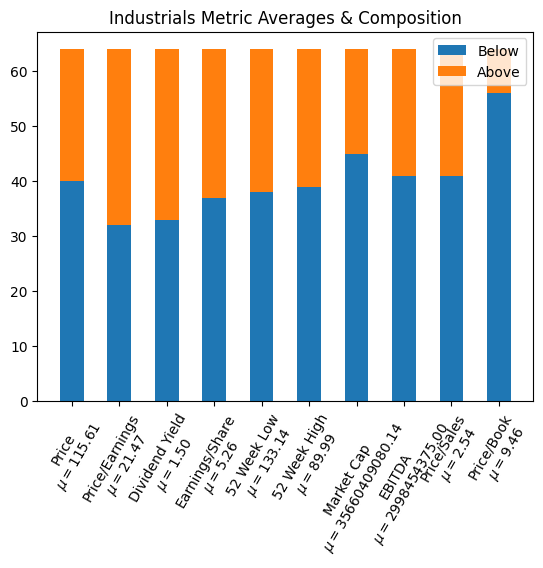

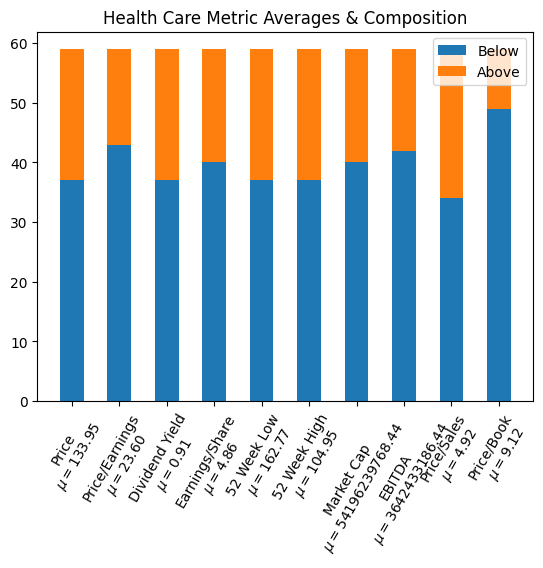

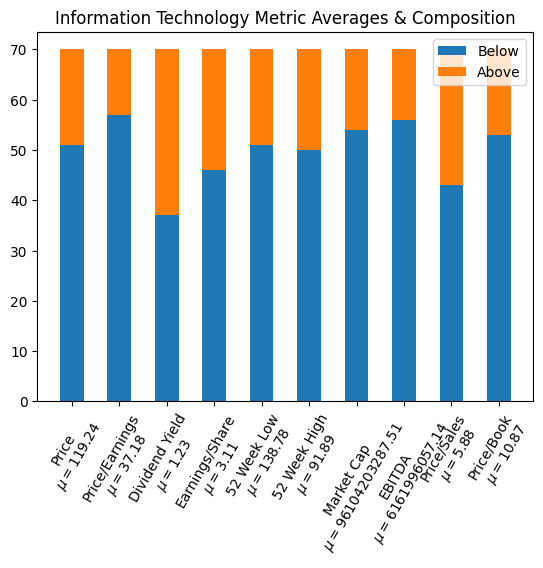

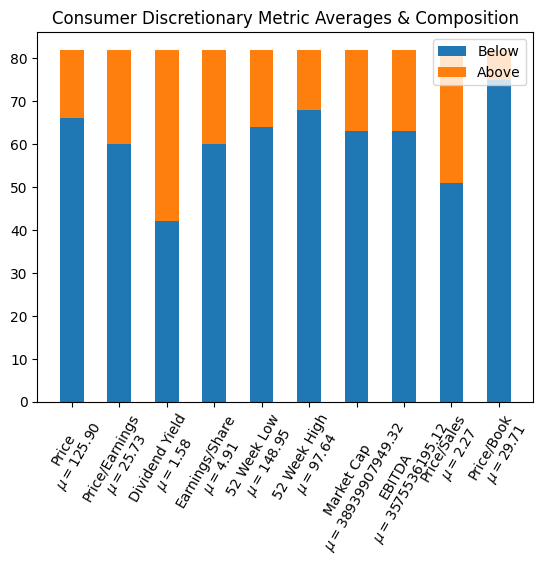

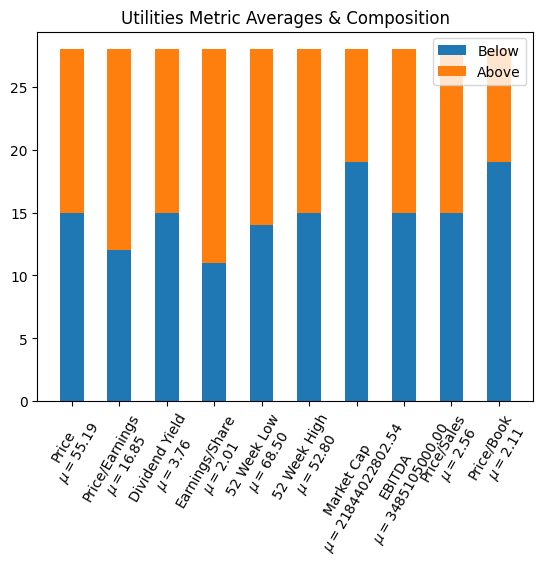

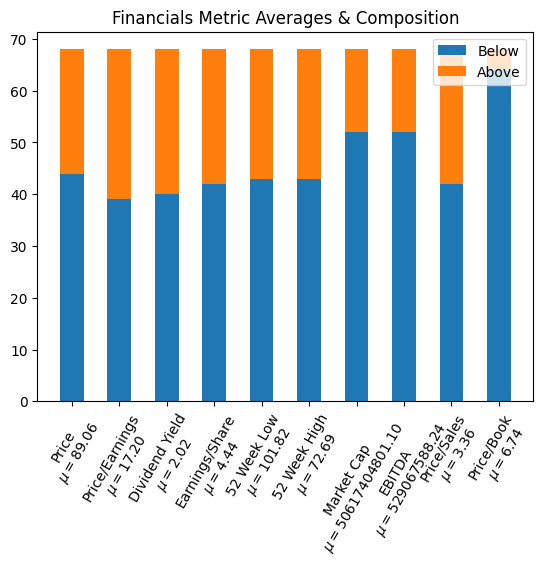

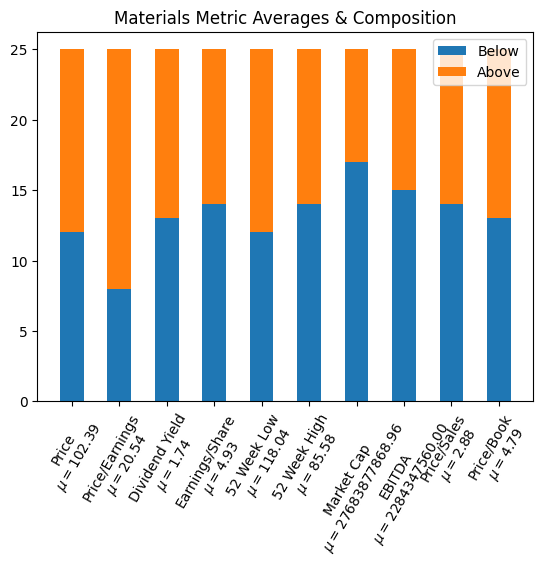

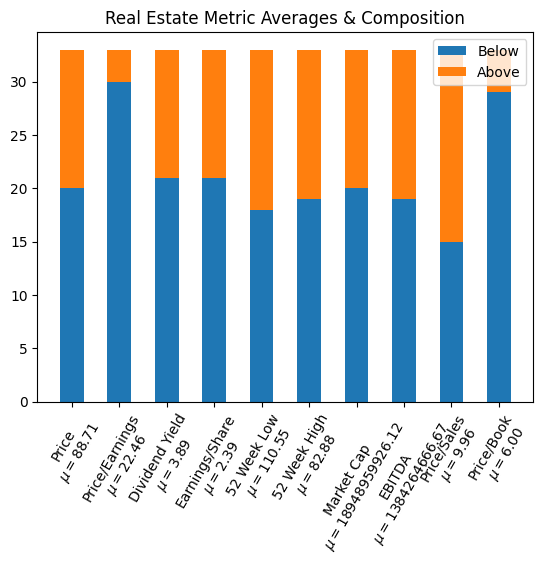

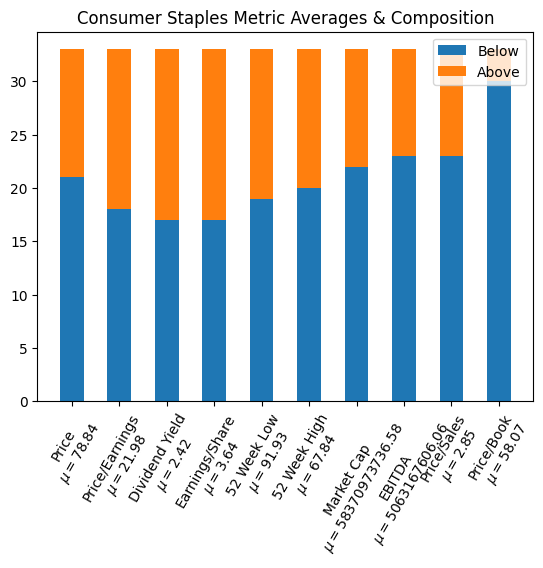

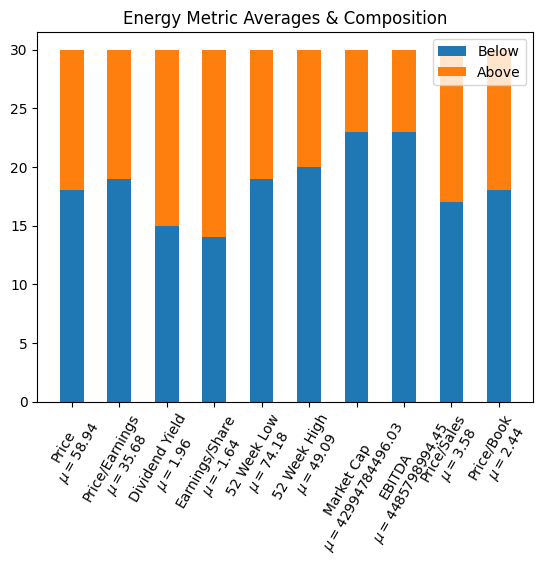

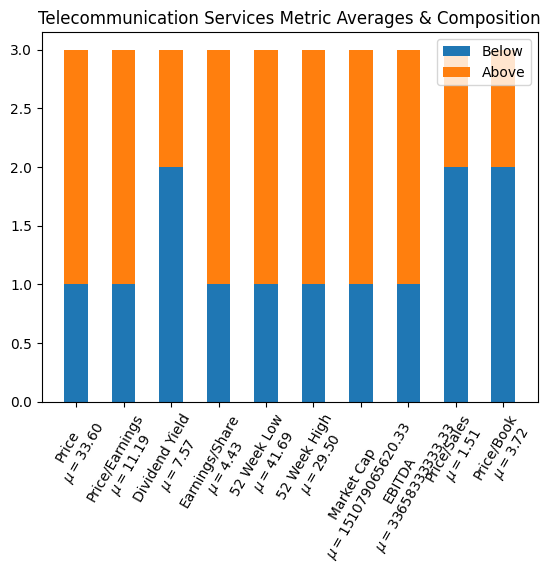

In [10]:
sectors = dfs['Sector'].unique()
for sector in sectors:
    metrics, weight_counts = extract_sector_composition(sector)
    plot_weights(sector, metrics, weight_counts)

This visualization shows us how metrics and ratios are broken down for each sector, for example stocks in the Consumer Dicretionary Sector have really high average stats while most stocks are actually below this average (it's dominated by a few large players!).

# Method

### ML Models

We will be using two main machine learning methods for our purposes: <br> <br>
    1) K-NN classifier w/ Stratified KFold <br>
    2) MiniBatch KMeans Clustering

The K-NN classifiers will be used to gauge how indicative old/new sector names are of a stock's financial data. That is, we will be training both classifier models on the same set of financial data for each stock (x features are listed in the data dictionary) and measuring how accurately the cross-validated model can predict the corresponding sector name, while keeping performance-effecting factors such as K and n_splits constant. We believe that the weighted f-1 score (a harmonic mean of a models precision and recall, i.e. the model's accuracy) of our K-NN classifiers are indicative of how relevant the financial data of a stock is to it's corresponding sector, whether that be the default S&P sectors or our new sectors.  <br> <br>

Our new sectors will be attained from using MiniBatchKMeans to allocate each stock to one of 12 new clusters. A few notes on MiniBatchKMeans and how we optimized our parameters: <br> <br>
    1) MiniBatchKMeans uses stochastic gradient descent to, an optimization algorithm to find model parameters which                 correspond to best fit between predicted and actual outputs, on small randomly selected batches to update cluster centroids. <br>  <br>
    2) Compared to standard KMeans, MiniBatch may produce less "accurate" results. However, the intent of our project is not to     necessarily minimize the differences in each cluster, but to produce clusters that are most predictable based on financial       data.  <br> <br>
    3) MiniBatchKMeans with convergence (the while loop in our clustering code which updates labels until the algorithm finds a     'stable' solution) allows more leeway in terms of the minimum and maximum clusters per group since batches are chosen and        tested on a random basis.  <br> <br>
    4) We took three metrics into consideration when choosing the parameters for our MiniBatch: variance between cluster sizes,     mean distance from centroid, and the accuracy of a corresponding KNN classifier. Using a standard KMeans approach allowed us     to produce the lowest mean distance from centroid (only about 30 less than that of a MiniBatch with optimized random_state),     while MiniBatch allowed us to produce the lowest variance among cluster sizes. Lower variance among cluster sizes produced a     K-NN classifier with significantly higher (>0.15) accuracy macro-averages, yet lower weighted f-1 score. However, in order       to produce the MOST accurate classifier (in regards to our goal of optimize f1-score) with our new Clusters, we needed to       find a balance of mean distance to centroid and cluster size, which ended up constituting a random state of 2 and cluster       size of 12.

### Cluster Naming

Our project aim was to create more natural categorizations of stocks based on financial data in order to make investing less daunting. After generating clusters using our ML methods, they are arbitrarily named from 0-(n clusters). We decided to rename these clusters to reflect on the key financials captured in each group. To do this we used a coded approach with Price (P), Yield (Y), and Volatility (V) each ranked on a scale from 1-3 based on relative cluster positioning. To do this, we took a look at the average of each metric per each cluster and ranked them with 3 being the clusters with a higher average respective metric, and 1 being the clusters with a lower average respective metric. We find that this code is not only a valid reflection fo the stocks in that cluster, but interpretable to an informed audience.
Ex:
A stock under 2P1Y3V would be moderately priced with little yield and high volatility

# Results

<a id='link1'></a>

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



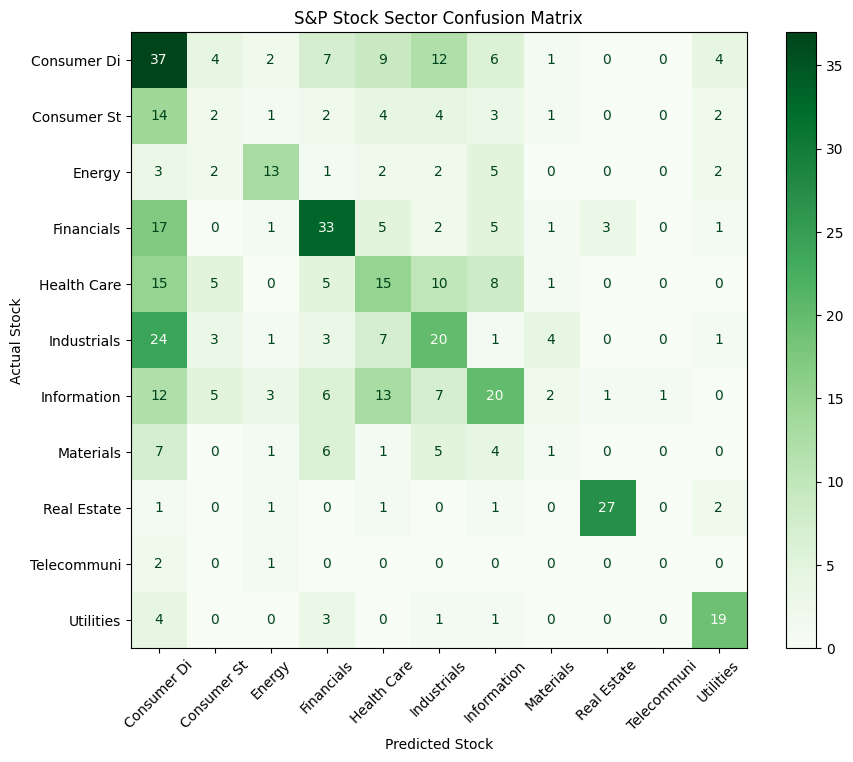

                            precision    recall  f1-score   support

    Consumer Discretionary       0.27      0.45      0.34        82
          Consumer Staples       0.10      0.06      0.07        33
                    Energy       0.54      0.43      0.48        30
                Financials       0.50      0.49      0.49        68
               Health Care       0.26      0.25      0.26        59
               Industrials       0.32      0.31      0.31        64
    Information Technology       0.37      0.29      0.32        70
                 Materials       0.09      0.04      0.06        25
               Real Estate       0.87      0.82      0.84        33
Telecommunication Services       0.00      0.00      0.00         3
                 Utilities       0.61      0.68      0.64        28

                  accuracy                           0.38       495
                 macro avg       0.36      0.35      0.35       495
              weighted avg       0.38      0.3

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# load data and define x features
dfc = pd.read_csv("constituents-financials.csv").dropna()
x_ft = dfc.columns[2:14]

# normalize data via dividing by std -> column means = 0 & std = 1
dfc[x_ft] = dfc[x_ft].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

# extract x and y values
x = dfc[x_ft].values
y = dfc['Sector'].values

# define optimized and consistent k/n values
k = 5
n_splits = 5

# initialize consistent StratifiedKFold object 
skf = StratifiedKFold(n_splits=n_splits)

# allocate an empty same-shape-array to store predictions in
y_pred = np.empty_like(y)

# initialize knn classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

for train_idx, test_idx in skf.split(x, y):
    # arrays to store parts of sample data
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_train = y[train_idx]

    # fit classifier onto training sample
    knn_classifier.fit(x_train, y_train)

    # predict which sector the stock belongs to 
    y_pred[test_idx] = knn_classifier.predict(x_test)

# create confusion matrix to display results
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)

# cut off labels to first 11 letters
lbls = np.unique(y)
clbls = [s[0:11] for s in lbls]

# adjust size/color and display
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=clbls)
fig, ax = plt.subplots(figsize=(10, 8))
conf_mat_disp.plot(ax=ax, cmap=plt.cm.Greens, xticks_rotation=45)

ax.set_title('S&P Stock Sector Confusion Matrix')
ax.set_xlabel('Predicted Stock')
ax.set_ylabel('Actual Stock')

# display classification report & matrix
plt.show()
print(classification_report(y_true=y, y_pred=y_pred, zero_division = False))

<a id='link1'></a>

##### We began our research by examining how well our K-NN classifier would be able to categorize S&P 500 stocks into the provided sectors based off financial ratios. As seen from our classification report, our model was unable to consistently predict the sector of each stock, in fact the model was only accurate about a third of the time.

In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin_min

# load csv as df
dff = pd.read_csv("constituents-financials.csv").dropna()

# normalize df & extract x values
dff[x_ft] = dff[x_ft].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x = dff[x_ft].values

# define the number of clusters
n_clusters = 12

# define min and max samples / cluster - this is not a strict min/max
min_samples = len(x) // n_clusters 
max_samples = min_samples + 1

# initialize mini batch clustering model
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=len(x), random_state=2)

# fit data until convergence and store stable labels
labels = np.empty(len(x))
while True:
    kmeans.fit(x)
    labels_new = kmeans.predict(x)
    if (labels == labels_new).all():
        break
    labels = labels_new

# add column in df for new arbitrary cluster names
dff['Cluster Name'] = labels

# print arbitrary cluster names and size
print('Name | Size')
print('-----------')

print(dff['Cluster Name'].value_counts())
print('-------------------------------')

# Calculate the variance of the cluster sizes
variance = dff['Cluster Name'].value_counts().var()
print(f"Variance of cluster sizes: {variance: .2f}")
print('-------------------------------')

# calculate mean distance to centroid 
mean_d = -kmeans.score(x)
print(f"Mean distance to centroid: {mean_d: .2f}")

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Name | Size
-----------
0     118
1      75
10     66
3      52
9      48
2      35
4      34
5      27
11     21
7       7
6       7
8       5
Name: Cluster Name, dtype: int64
-------------------------------
Variance of cluster sizes:  1106.20
-------------------------------
Mean distance to centroid:  1930.07


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [13]:
print(dff)

                       Name                  Sector     Price  Price/Earnings  \
0                3M Company             Industrials  0.877456       -0.008446   
1           A.O. Smith Corp             Industrials -0.324043        0.076181   
2       Abbott Laboratories             Health Care -0.353369       -0.052599   
3               AbbVie Inc.             Health Care  0.032307       -0.128641   
4             Accenture plc  Information Technology  0.342784        0.020009   
..                      ...                     ...       ...             ...   
500              Xylem Inc.             Industrials -0.250173        0.154186   
501         Yum! Brands Inc  Consumer Discretionary -0.205407        0.063671   
502  Zimmer Biomet Holdings             Health Care  0.084386       -0.253496   
503           Zions Bancorp              Financials -0.394441       -0.169850   
504                  Zoetis             Health Care -0.240791        0.199811   

     Dividend Yield  Earnin

<a id='link3'></a>
##### Created our clusters and assigned new naming conventions as discussed above.

In [14]:
# load fresh dataset and add labels
df_stocks = pd.read_csv("constituents-financials.csv").dropna()
df_stocks['Cluster Name'] = labels 

# group by cluster and analyze means
by_cluster = df_stocks.groupby('Cluster Name').mean(numeric_only = True)

# create dict to map cluster names to coded labels
cluster_names = {
    0: "1P2Y2V (0)",
    1: "1P1Y3V (1)",
    2: "1P2Y1V (2)",
    3: "2P1Y2V (3)",
    4: "1P1Y1V (4)",
    5: "1P3Y2V (5)",
    6: "1P2Y1V (6)",
    7: "1P1Y2V (7)",
    8: "3P0Y1V (8)",
    9: "1P1Y3V (9)",
    10: "1P1Y1V (10)",
    11: "2P2Y2V (11)",
}

dff['Cluster Name'] = np.vectorize(cluster_names.get)(labels)

<a id='link2'></a>

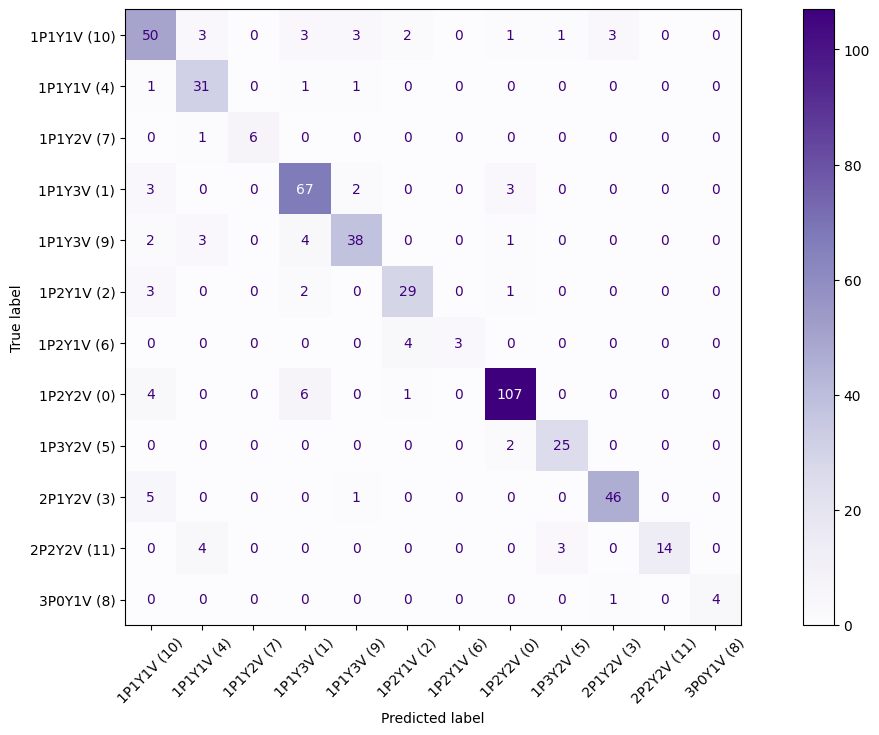

              precision    recall  f1-score   support

 1P1Y1V (10)       0.74      0.76      0.75        66
  1P1Y1V (4)       0.74      0.91      0.82        34
  1P1Y2V (7)       1.00      0.86      0.92         7
  1P1Y3V (1)       0.81      0.89      0.85        75
  1P1Y3V (9)       0.84      0.79      0.82        48
  1P2Y1V (2)       0.81      0.83      0.82        35
  1P2Y1V (6)       1.00      0.43      0.60         7
  1P2Y2V (0)       0.93      0.91      0.92       118
  1P3Y2V (5)       0.86      0.93      0.89        27
  2P1Y2V (3)       0.92      0.88      0.90        52
 2P2Y2V (11)       1.00      0.67      0.80        21
  3P0Y1V (8)       1.00      0.80      0.89         5

    accuracy                           0.85       495
   macro avg       0.89      0.80      0.83       495
weighted avg       0.86      0.85      0.85       495



In [15]:
from copy import copy

# Extract the same feature values from the dataframe
x_ft = dff.columns[2:-1]

x = dff[x_ft].values
y = dff['Cluster Name'].values

# setting consistent k and n_splits value
k = 5
n_splits = 5

# initialize classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of consistent kfold object
kfold = StratifiedKFold(n_splits=5)

# allocate an array to store predictions in
y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # arrays to store parts of sample data
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y[train_idx]

    # fit classifier onto training sample
    knn_classifier.fit(x_train, y_true_train)

    # predict which word is being said
    y_pred[test_idx] = knn_classifier.predict(x_test)

# create confusion matrix to display our results
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
acc_conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

# plot confusion matrix
fig, ax = plt.subplots(figsize=(16, 8))
acc_conf_mat_disp.plot(ax=ax, xticks_rotation=45, cmap='Purples')

# display plot and classification report
plt.show()
print(classification_report(y, y_pred))

##### After using Mini-batch k-means clustering and then training a model on the new clustered sets, we were able to achieve an f1 score of around 85 percent, meaning that the model was consistent with predicting the cluster that stocks would fall under when trained on their financial ratios. 

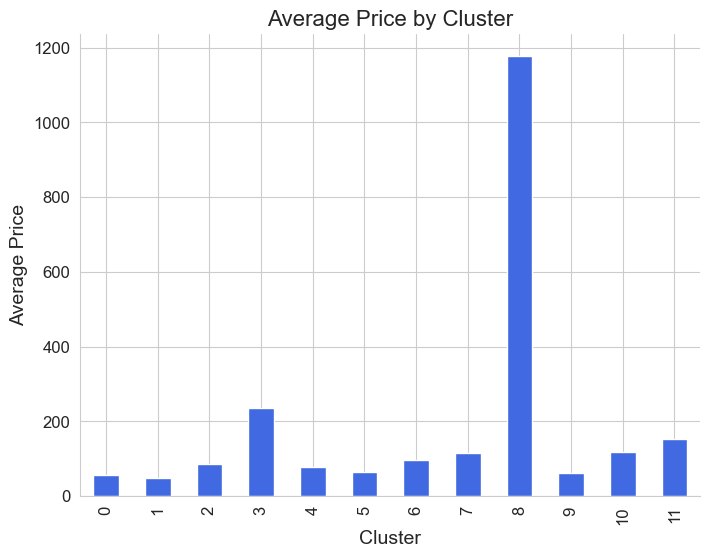

In [16]:
import seaborn as sns

sns.set_style("whitegrid")

# create a bar chart showing the average price for each cluster
ax = df_stocks.groupby("Cluster Name")["Price"].mean().plot(kind="bar", figsize=(8, 6), color="royalblue")

# customize the plot visuals
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average Price by Cluster", fontsize=16)

# remove the top and right spines
sns.despine()

# display the plot
plt.show()

##### We used graphs like this as mentioned above to determine which scale rating each cluster receives for a given metric

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')

# append a volatility column 
dff['Volatility'] = (dff['52 Week Low'] - dff['52 Week High'])/ dff['Price']

# Create a scatter plot for determined cluster
def scatter(cluster, x_var, y_var):
        data = dff[dff['Cluster Name'] == cluster]
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=x_var, y=y_var, data=data, hue='Sector', alpha=0.7, s=100)
        plt.xlabel(f'{x_var}')
        plt.ylabel(f'{y_var}')
        plt.title('Cluster ' + str(cluster) + ' Stocks' + f" ({len(data['Price'].values)})")
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        sns.despine()
        plt.show()

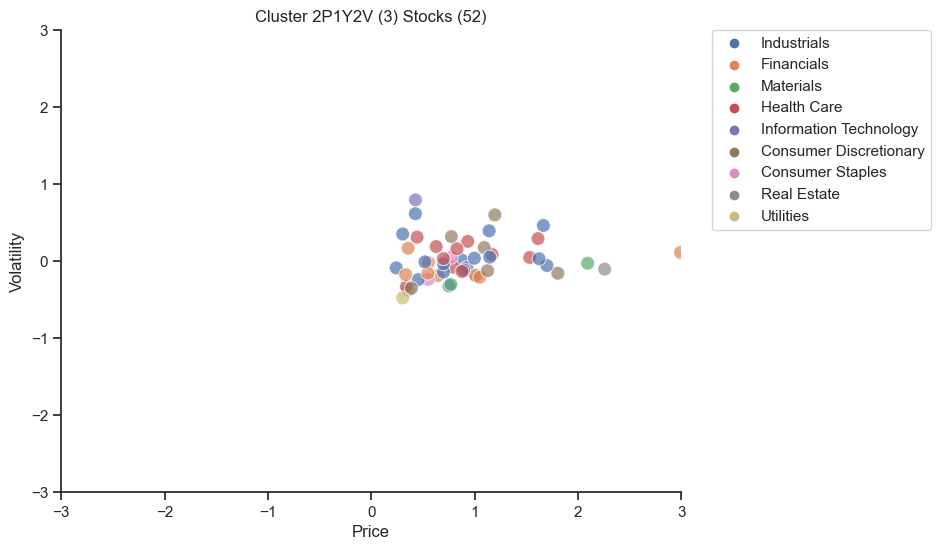

In [18]:
scatter('2P1Y2V (3)', 'Price', 'Volatility')

##### Scatter graph function that illustrates total count of stocks within a cluster, their legitimate sector identification and then displays each stock on a 2d axis using two of the three cluster identification terms. All data has been normalized here to be able to compare clusters on the same scale. Cluster used here is cluster three which is ranked 2 out of 3 in price, 1 out of 3 in dividend yield, and 2 out of 3 for volatility.

# Discussion
We started off by taking a look at how distinguishable the current 11 sector categorizations in the S&P 500 are to a K-NN classifier. We chose to use a K Nearest Neighbor classifier because our aim is to group stocks by their financial proximity to each other. With applying only scale-normalization and using cross-validation, our trained model had a weighted f-1 score of 0.35. Precision is a models ability to not produce false positives, while recall is the ability to produce true positives, with f-1 being a harmonic mean of both measures and the key metric we’re using to determine the effectiveness of our model. So, with the default sectors, our model is only accurately distinguishable using financial metrics only about a third of the time.

Evidently, industry is not the best classifier for stocks, nor does it indicate any similaritiy in the stock movement of stocks within the same industry. Thus, we created a new algorithm. Our Mini-batch K-means clustering algorithm had a cross-validated weighted f-1 score of 0.85. This means that our new sector names are distinguishable using financial metrics 85% of the time as opposed to the default benchmark of 35% of the time. Furthermore, we have a macro average of 0.89 for precision, meaning our model excels at precisely identifying which stocks fall into each new cluster.

Overall, our project was a success. We clearly showed that industry is not a good classifier for stocks and there is a better way to categorize stocks. However, this does not necessarily mean our clustering is the best way to group stocks. There are drawbacks that exist within our methodology. First, we utilized limited financial data. It is plausible there are other ratios or metrics that may be more influential that we were unaware of. With more finances, the algorithm may be able to create better clusters of stocks that are more indicative of their performance. Second, our algorithm has some subjectivity in it. The financial data we used contained metrics and ratios that were deemed important by industry professionals, but this does not signify full coverage of a company's financial stance. Thus, there are numbers that could be biased or hide important finances. Third, we recognize that stocks in the S&P 500 have to meet a certain criteria (for example, a market capitalization greater than or equal to $12.7 billion) which means that there are other public companies that may look severely different than the stocks we analyzed and categorized. Thus, these findings should be taken into consideration but not fully applied since there are a large array of public companies that have not been accounted for with different financial data. Still, it is important that there is a way to make stocks more approachable for the typical, non-finance person which we have shown and this is a considerable discovery since investing is a critical step in becoming financially stable. 

### Future Steps
1. As mentioned above, there are some flaws or missing aspects in the dataset we used. A future project or application of our algorithm could be to a dataset with greater finance metrics and ratios, as well as one that includes stocks outside of the S&P 500.
2. We believe there should be an attempt within the stock market industry to find a new way to categorize stocks. Currently, stocks require a lot of research in order for users to feel safe about their investments which makes it seem daunting. However, it should be accessible (meaning also understandable) to the general public. 

Some questions that should be considered include: How do we make stocks more approachable? What specific factors resulted in 42% of Americans not owning stocks? Are price, yield, and volatility the best metrics to distinguish stocks? What liabilities could arise from changing stock categorization?

### Ethical Dimensions
1. Our project is more of a proof-of-concept that sectors in the S&P can and perhaps should be renamed to make investing less daunting, however, we do not want our project to be taken as legitamate portfolio advice because it fails to econmpass the full financial dimensionality of each stock.
2. The Stock Market is inherently extremely difficult to classify, sort, or predict (that's why people get paid a lot to do it well!). Thus, this project should not be used as a means to try and predict the stock market and generate income!